# Task c)
This question asks you to simulate a quantum walk on a computer and plot the output probabilities after 50 steps of a quantum walk for a system of size d = 50. For help with numpy we suggest to look into its API https://numpy.org/doc/stable/reference/ where you can search for functions and their documentation. It is not required that you follow the steps outlined below as the outcome of this coding part of the assignment are the two plots you are asked to produce and attach them to your assignment solutions.

In [2]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Set the size of your system
d = 50
#Set the dimension of the quantum register
dim = (2 * d) + 1
#Set the number of steps
number_of_steps = 50

mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_style("whitegrid")
mpl.rcParams.update({
    'font.size' : 16,
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'axes.facecolor':   'none' ,
    'figure.facecolor': 'none',
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.spines.bottom': True,
    'axes.spines.left': True,
    'lines.linewidth':2,
    'grid.linewidth':2,


    'axes.linewidth': 2,
    'grid.linestyle': 'dotted',
    'axes.edgecolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.major.size': 5,
    'xtick.major.width': 2
})


Implement U↪ and U↩ of the corresponding dimensions. For this, generalize our solution for a)3. (You might find **np.eye**(n=dim, k=index of diagonal) useful.)

In [4]:

U_right= np.eye(dim, dim, -1)
U_right[0, dim-1] = 1

In [5]:
U_left = np.eye(dim, dim, 1)
U_left[dim-1, 0] = 1

Implement the corresponding quantum walk step matrix W of equation (1) but now with size d x d. (You might find np.block(arrays) useful)

In [6]:
arr = [[U_right, U_right * 1j], [U_left * 1j, U_left]]
W = (1 / math.sqrt(2)) * np.block(arr)

Initialize the input state |$\psi$>, corresponding to a vector of size 2d + 1 where all
elements are zero except the d + 1th element that is 1, (encoding position d as label start at
zero) and initialize the overall input state to (|0>$\otimes$|$\psi$>), setting the input for quantum coin to |0>. (You might find **np.zeros**(dims) and **np.block**(array) useful.)

In [7]:
lower_register = np.zeros(dim)
lower_register[d] = 1
upper_register = np.array([1, 0])
input_state = np.block([lower_register, np.zeros(dim)])

Apply W 50 times to the input state |0⟩|d⟩, i.e., |$\psi_{final}$>=$W^{50}$|0⟩|d⟩. You may find **np.matmul**(a,b) and **np.linalg.matrix_power**(array, exponent) useful.

In [8]:
psi_final=np.linalg.matrix_power(W, number_of_steps)@input_state

For even indices $i$, compute the output probabilities $y[i]=p(i)$ generalizing to d = 50 the formula in the task b.3). $p(i)=0$ for $i$ being odd and hence we do not plot them. *x_even* is a premade list of the indices on the x-axes, so what you need to implement below is evaluation of probabilities $y[i]=p(i)$

In [9]:
d = 50
dim = (2 * d) + 1
number_of_steps = 50

U_right= np.eye(dim, dim, -1)
U_right[0, dim-1] = 1

U_left = np.eye(dim, dim, 1)
U_left[dim-1, 0] = 1

# Create the matrix that enacts the step (both quantum and classical)
W = (1 / math.sqrt(2)) * np.block([[U_right, U_right * 1j], [U_left * 1j, U_left]])
C = 0.5 * np.block([[U_right, U_right], [U_left, U_left]])


# Create walker's register
lower_register = np.zeros(dim)
lower_register[d] = 1

# Choose initial state of coin register
inital_coin_state_0 = np.array([1, 0])
inital_coin_state_1 = np.array([0, 1])
inital_coin_state_plus = (1/math.sqrt(2))*np.array([1, 1])

initial_coin_state = inital_coin_state_0

# Create input state
input_state= np.kron(initial_coin_state, lower_register)

# Do n steps (choose either quantum or classical step)
final_state = np.linalg.matrix_power(W, number_of_steps)@input_state

x_even=np.arange(0, dim, 2)

y=[]
for x in x_even:
    # Calculate the probabilities of all even position states i
    y.append(final_state[x].conj()*final_state[x] + final_state[x+dim].conj()*final_state[x+dim])


Save the plot and attach it to your answers to the assignment.*italicised text*

C:\Users\megan\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\megan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


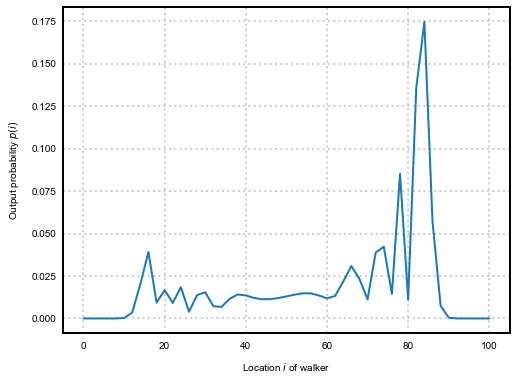

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=x_even, y=y , ax=ax)
#ax.set(title="Quantum Random Walk on a Ring")
plt.xlabel("Location $i$ of walker", labelpad=10)
plt.ylabel("Output probability $p(i)$", labelpad=10)
#plt.title("Quantum Random Walk on a Ring", pad = 15)
plt.show()

# Task d)
It is not difficult to convince yourself that a step of the classical walk is represented by the
matrix
\begin{equation}
C=\frac{1}{2}\begin{pmatrix}
U_{\hookrightarrow} & U_{\hookrightarrow} \\
U_{\hookleftarrow} & U_{\hookleftarrow}
\end{pmatrix}
\end{equation}
(the matrices U↪ and U↩ being cyclic permutation). The product $C^{50}p_d$ will simulate 50 steps of the classical walk on the input state $p_d$, where $p_d$ is the vectors of all zeros except 1 in position d (d + 1 element of the vector as we start with label 0). With less guidance as in the previous task, use the similar approach to calculate the output probabilities y_classical

In [11]:
arr = [[U_right, U_right], [U_left, U_left]]
C = 0.5 * np.block(arr)

output_state_c = np.linalg.matrix_power(C, number_of_steps)@input_state
output_state_c = output_state_c/np.linalg.norm(output_state_c)

# for i in range(number_of_steps):
#     output_state = C@input_state
#     #normalise the state
#     output_state = output_state/np.linalg.norm(output_state)
#     input_state=output_state


# output_state_c = input_state

x_odd=np.arange(1, dim, 2)
x_even=np.arange(0, dim, 2)
xs = [i for i in range(dim)]

y_classical=[]
for x in x_even:
    y_classical.append(output_state_c[x].conj()*output_state_c[x] + output_state_c[x+dim].conj()*output_state_c[x+dim])

C:\Users\megan\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\megan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


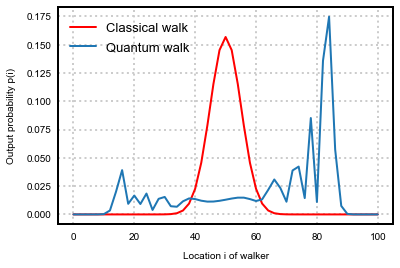

In [12]:
fig, ax = plt.subplots()
sns.lineplot(x=x_even, y=y_classical , ax=ax, color='red', label="Classical walk")
sns.lineplot(x=x_even, y=y , ax=ax, label="Quantum walk")
#ax.set(title="Classical Random Walk on a Ring", ylabel="Output probability")
#plt.tight_layout()
plt.xlabel("Location i of walker", labelpad=10)
plt.ylabel("Output probability p(i)", labelpad=10)
plt.legend(frameon=False,fontsize="13",loc='upper left', bbox_to_anchor=(0, 0.98))


plt.show()

The following code will plot the result of the classical walk in red superimposed to the plot of quantum walk result from previous task. Save the plot and attach it to your answers to the assignment.

C:\Users\megan\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\megan\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Classical and Quantum Random Walk')

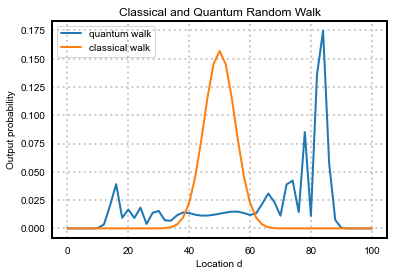

In [13]:
plt.plot(x_even, y)
plt.plot(x_even, y_classical)
plt.legend(["quantum walk","classical walk"])
plt.xlabel("Location d")
plt.ylabel("Output probability")
plt.title("Classical and Quantum Random Walk")

# Task f)
You can either argue about your answer or run some experiments below and convince yourself about the answer. You are free to use space below to run any kind of experiment you think that might be helpful for your reasoning.

In [14]:
arr = [[U_right, U_right * 1j], [U_left * 1j, U_left]]
W = (1 / math.sqrt(2)) * np.block(arr)

lower_register = np.zeros(dim)
lower_register[d] = 1
upper_register = np.array([1, 0])
input_state_0 = np.block([lower_register,np.zeros(dim)])
input_state_1 = np.block([np.zeros(dim),lower_register])
input_state_plus = (1/math.sqrt(2))*np.block([lower_register,lower_register])

final_state_0 = np.linalg.matrix_power(W, number_of_steps)@input_state_0
final_state_1 = np.linalg.matrix_power(W, number_of_steps)@input_state_1
final_state_plus = np.linalg.matrix_power(W, number_of_steps)@input_state_plus




x_even=np.arange(0, dim, 2)

y_0=[]
y_1=[]
y_plus=[]
for x in x_even:
    y_0.append(np.abs(final_state_0[x])**2 + np.abs(final_state_0[x+dim])**2)
    y_1.append(np.abs(final_state_1[x])**2 + np.abs(final_state_1[x+dim])**2)
    y_plus.append(np.abs(final_state_plus[x])**2 + np.abs(final_state_plus[x+dim])**2)

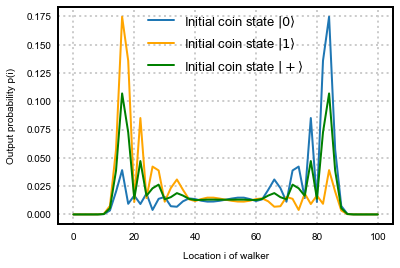

In [15]:
fig, ax = plt.subplots()

#colours= sns.color_palette("P")
sns.lineplot(x=x_even, y=y_0 , ax=ax, label="Initial coin state $|0\\rangle$")
sns.lineplot(x=x_even, y=y_1 , ax=ax, color='orange', label="Initial coin state $|1\\rangle$")
sns.lineplot(x=x_even, y=y_plus , ax=ax, color='green', label="Initial coin state $|+\\rangle$")
#ax.set(title="Classical Random Walk on a Ring", ylabel="Output probability")
#plt.tight_layout()

plt.xlabel("Location i of walker", labelpad=10)
plt.ylabel("Output probability p(i)", labelpad=10)
plt.legend(frameon=False,fontsize="13", loc='center', bbox_to_anchor=(0.5, 0.83))


plt.show()

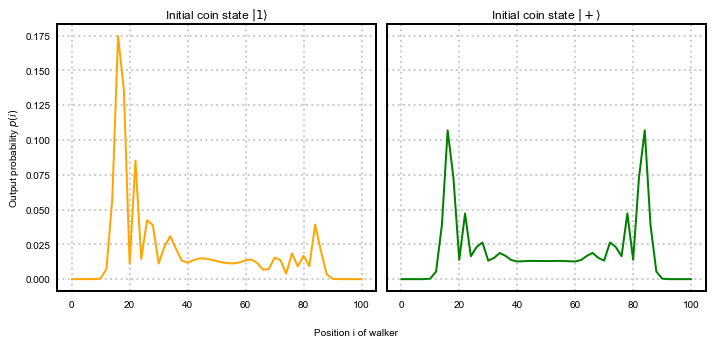

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,4.5), sharey=True)
plt.subplots_adjust(wspace=0, hspace=0.8)

sns.lineplot(x=x_even, y=y_1 , ax=ax1, color='orange')
sns.lineplot(x=x_even, y=y_plus , ax=ax2, color='green')
ax1.set(title="Initial coin state $|1\\rangle$", ylabel="Output probability $p(i)$")
ax2.set(title="Initial coin state $|+\\rangle$")
plt.tight_layout()

plt.text(-30, -0.04, "Position i of walker")

plt.show()

## Task g)

In [46]:
d = 50
#Set the dimension of the quantum register
dim = (2 * d) + 1
#Set the number of steps
number_of_steps = 50

U_right= np.eye(dim, dim, -1)
U_right[0, dim-1] = 1

U_left = np.eye(dim, dim, 1)
U_left[dim-1, 0] = 1

arr = [[U_right, U_right * 1j], [U_left * 1j, U_left]]
W = (1 / math.sqrt(2)) * np.block(arr)

lower_register = np.zeros(dim)
lower_register[d] = 1
upper_register = np.array([1, 0])
input_state = np.block([np.zeros(dim),lower_register])
p0 = np.array ([[1,0],[0,0]])
p1 = np.array ([[0,0],[0,1]])

projector_0 = np.kron(p0, np.eye(dim))
projector_1 = np.kron(p1, np.eye(dim))


# Probability of obtaining the state |1> for the coin qubits
def iterate_walk(n):
    x_values= []
    x_even=np.arange(0, dim, 2)


    for j in range(n):
        input_state = np.block([lower_register, np.zeros(dim)])
        for i in range(number_of_steps):
            state_after_step =  W @ input_state
            measured_zero = projector_0@state_after_step
            measured_one = projector_1@state_after_step

            prob0 = np.linalg.norm(measured_zero)**2
            # Probability of obtaining the state |1> for the coin qubits
            prob1 = np.linalg.norm(measured_one)**2


            p = [prob0,prob1]
            p = p/sum(p)


            result = np.random.choice([0, 1], p=p)
            if result == 0:
                input_state = np.kron([1,0], state_after_step[:dim])
            else: input_state = np.kron([0,1],state_after_step[dim:])

            input_state = input_state/np.linalg.norm(input_state)


        y = []
        for x in x_even:
            y.append(input_state[x].conj()*input_state[x] + input_state[x+dim].conj()*input_state[x+dim])

        x_values.append(2*np.argmax(y))
    return x_values

x_values = iterate_walk(500)

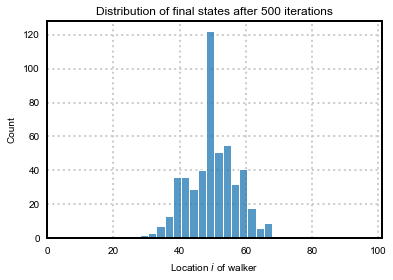

In [47]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(x_values, ax=ax)

#ax.set(title="Quantum Random Walk on a Ring")
ax.set(xlim=(0,101),title="Distribution of final states after 500 iterations")
plt.xlabel("Location $i$ of walker", labelpad=5)
plt.ylabel("Count", labelpad=7)
#plt.title("Quantum Random Walk on a Ring", pad = 15)
plt.show()

In [24]:
counts = np.zeros((1,dim))
for x in x_values:
    counts[x] += 1

x_even=np.arange(0, dim, 2)

print(x_even.size)
print(counts.size)

fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=x_even, y=counts , ax=ax)
#ax.set(title="Quantum Random Walk on a Ring")
plt.xlabel("Location $i$ of walker", labelpad=10)
plt.ylabel("Output probability $p(i)$", labelpad=10)
#plt.title("Quantum Random Walk on a Ring", pad = 15)
plt.show()



IndexError: index 23 is out of bounds for axis 0 with size 1